In [1]:
%matplotlib inline

#from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import plot_model

from IPython.display import SVG

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set()

print('Using Tensorflow version: {}, and Keras version: {}.'.format(tf.__version__, tf.keras.__version__))

Using Tensorflow version: 2.4.0, and Keras version: 2.4.0.


In [2]:
 # Load CSV using Pandas
import pandas as pd
filename = 'housing.data'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B','LSTAT','MEDV']
data = pd.read_csv(filename, names=names, delimiter='\s+')

print(data.shape)
print(data.head())
print(data.info())



(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      

In [3]:
#Checkout the data
#First row of the data
print(data.head(1))
#Last row of the data
print(data.tail(1))
#sample of 5 rows of data
print(data.sample(5))
#describe() to get some summary statistics about the data, it helps to assess the data quality
print(data.describe())
pd.isnull(data).sum()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.09    1  296.0     15.3   

       B  LSTAT  MEDV  
0  396.9   4.98  24.0  
        CRIM   ZN  INDUS  CHAS    NOX    RM   AGE    DIS  RAD    TAX  PTRATIO  \
505  0.04741  0.0  11.93     0  0.573  6.03  80.8  2.505    1  273.0     21.0   

         B  LSTAT  MEDV  
505  396.9   7.88  11.9  
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
340  0.06151  0.0   5.19     0  0.515  5.968  58.5  4.8122    5  224.0   
233  0.33147  0.0   6.20     0  0.507  8.247  70.4  3.6519    8  307.0   
27   0.95577  0.0   8.14     0  0.538  6.047  88.8  4.4534    4  307.0   
87   0.07151  0.0   4.49     0  0.449  6.121  56.8  3.7476    3  247.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
340     20.2  396.90   9.29  18.7  
233     17.4  378.95   3.95  48.3  
27      21.0  306.38  1

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Explore data

Statistics for housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19
First quartile of prices: $17.02
Second quartile of prices: $25.00
Interquartile (IQR) of prices: $7.98


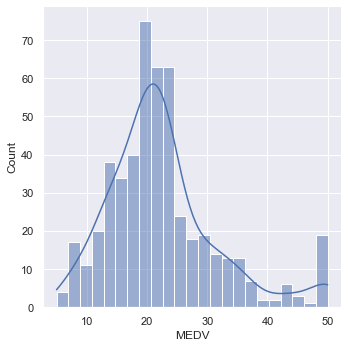

In [4]:
## Plot the distribution of the target variable MEDV bu using the distplot function from the seaborn library.

target_data=data['MEDV']
# TODO: Minimum price of the data

minimum_price = target_data.min()

# TODO: Maximum price of the data
maximum_price = target_data.max()

# TODO: Mean price of the data
mean_price = target_data.mean()

# TODO: Median price of the data
median_price = target_data.median()

# TODO: Standard deviation of prices of the data
std_price = target_data.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(target_data, 25)
third_quartile = np.percentile(target_data, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print ("Statistics for housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))
print ("First quartile of prices: ${:,.2f}".format(first_quartile))
print ("Second quartile of prices: ${:,.2f}".format(third_quartile))
print ("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(target_data, kde=True)
plt.show()

The values of MEDV are distributed normally with few outliers.

# PLOT DATA

 
Plotting all the attributes against the target value:

MEDV


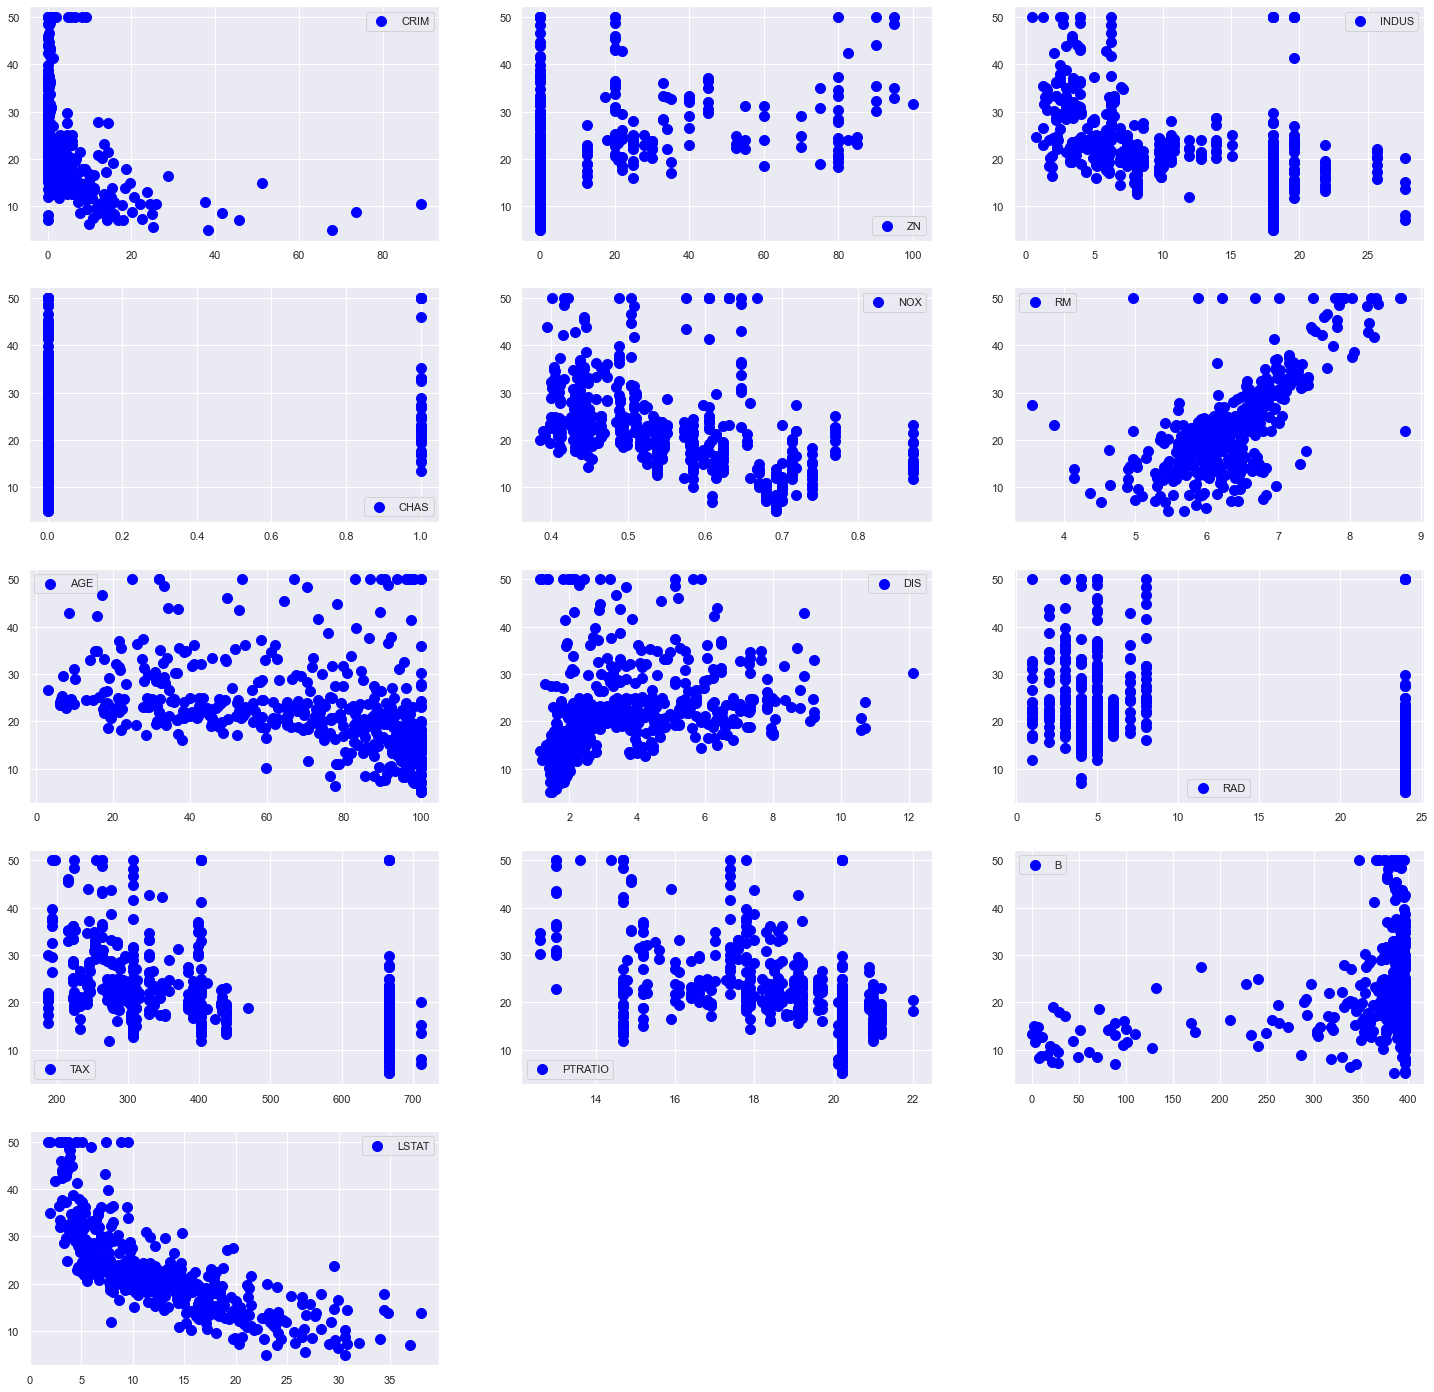

In [5]:
# Plot all the attributes against the target values
plt.figure(figsize=(25,25))
print(data.columns[-1])
for i in range(13):
    plt.subplot(5,3,i+1)
    plt.scatter(data.iloc[:,i], data['MEDV'], color='blue', s=100, label=data.columns[i])
    #plt.xlabel(data.columns[-1])
    plt.legend(loc='best')

# Corelation Matrix

<AxesSubplot:>

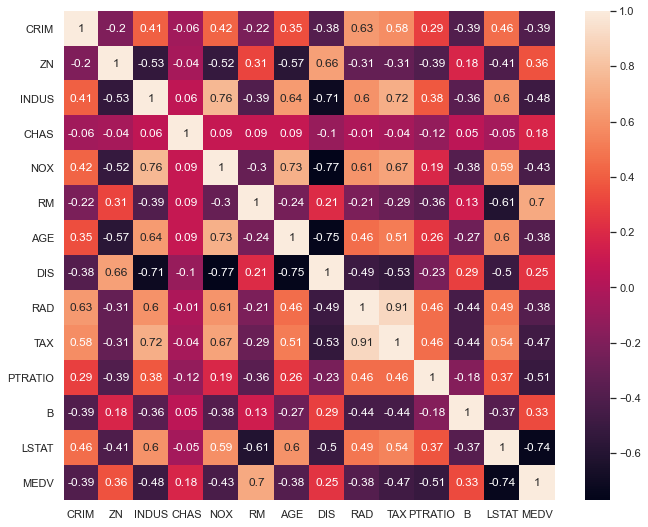

In [6]:
sns.set(rc={'figure.figsize':(11,9)})
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)




 ## Features consider are RM, LSTAT and PTRAITIO 

## STEP2 Dividing data into training and test Dataset

In [7]:
attribute_index=[ 'RM','LSTAT', 'PTRATIO']
# Dropping taget value from input features
input_data=data.drop(['MEDV'], axis=1)
input_data, target_data=shuffle(input_data, target_data)
# Split the data in which input data contains all 13 features
X_train_all, X_test_all, Y_train, Y_test = train_test_split(
    input_data, target_data, test_size=0.2, random_state=42)


X_train_triple = X_train_all.loc[:, ['RM','LSTAT', 'PTRATIO']]
X_test_triple = X_test_all.loc[:, ['RM','LSTAT', 'PTRATIO']]
     
print()
print('California housing data: train:',len(X_train_all),'test:',len(X_test_all))
print()
print('X_train_all:', X_train_all.shape)
print('X_train_triple:', X_train_triple.shape)
print('y_train:', Y_train.shape)
print()
print('X_test_all', X_test_all.shape)
print('X_test_triple', X_test_triple.shape)
print('y_test', Y_test.shape)



California housing data: train: 404 test: 102

X_train_all: (404, 13)
X_train_triple: (404, 3)
y_train: (404,)

X_test_all (102, 13)
X_test_triple (102, 3)
y_test (102,)


The training data matrix `X_train_all` is a matrix of size (`n_train`, 13), and `X_train_triple` contains only the three attributes (RM, LSTAT, PTRATIO). The vector `Y_train` contains the target value (median house value) for each housing district in the training set.

Start my analysis with the  tripple attributes. Later,I use all theirteen attributes in the regression.

## Now scale the input data to zero mean and unit variance: 

In [8]:
# User input for selecting dataset 1 (X_train_all, X_est_all) orestaset 2 (X_train_tripple, X_test_tripple)
print('Type True and then enter for all 13 features/just enter for 3 features (RM, LSTAT and PTRATIO) as input' )
all_attribute = bool(input())
#all_attribute =True

if all_attribute:
        X_train = X_train_all
        X_test = X_test_all
        print('all_attribute', all_attribute)
else:
        X_train = X_train_triple
        X_test = X_test_triple
        print('all_attribute', all_attribute)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('X_train_scaled: shape:', X_train_scaled.shape, 'mean:', X_train_scaled.mean(axis=0), 'std:', X_train_scaled.std(axis=0))
print()
print('X_test_scaled: shape:', X_test_scaled.shape, 'mean:', X_test_scaled.mean(axis=0), 'std:', X_test_scaled.std(axis=0))


Type True and then enter for all 13 features/just enter for 3 features (RM, LSTAT and PTRATIO) as input
True
all_attribute True
X_train_scaled: shape: (404, 13) mean: [ 3.51753830e-17 -4.83661516e-17 -2.06655375e-16  2.19846143e-17
 -4.83661516e-17  8.22224577e-16  1.75876915e-17 -1.36304609e-16
  1.23113840e-16  1.67083069e-16 -3.42959984e-16  1.31907686e-17
  2.81403064e-16] std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

X_test_scaled: shape: (102, 13) mean: [-0.00187232  0.08410612 -0.04652214 -0.05020263 -0.03837541  0.06435031
 -0.0473919  -0.0602887   0.05260692  0.07350625  0.0234083  -0.2406812
 -0.00872398] std: [0.85359304 1.16930116 1.00576724 0.91154435 1.0129868  0.90627484
 1.03518808 0.77289765 1.03944521 1.052031   0.98466146 1.26621626
 0.94656385]


## Step 3: Model Architecture 
### Building a Regression


Let's begin with a simple model that has a single hidden layer. 

In [9]:
slmodel = Sequential()
slmodel.add(Dense(units=16, input_dim=X_train.shape[1], activation='relu'))
slmodel.add(Dense(units=1))
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)
slmodel.compile(loss='mean_squared_error', 
                 optimizer=opt,metrics=['mae'])
print(slmodel.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None


### Fit the data 

Now train our first model.  An *epoch* means one pass through the whole training data. 

You can run code below multiple times and it will continue the training process from where it left off.  If you want to start from scratch, re-initialize the model using the code a few cells ago. 

In [10]:
%%time
epochs = 100

slhistory = slmodel.fit(X_train_scaled, 
                        Y_train,
                        epochs=epochs)

Epoch 1/100
13/13 [==============================] - 0s 660us/step - loss: 627.0915 - mae: 23.1263
Epoch 2/100
13/13 [==============================] - 0s 674us/step - loss: 532.7428 - mae: 21.1517
Epoch 3/100
13/13 [==============================] - 0s 666us/step - loss: 367.5812 - mae: 17.0884
Epoch 4/100
13/13 [==============================] - 0s 811us/step - loss: 161.4481 - mae: 10.7609
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 96.1400 - mae: 7.0044
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 56.0243 - mae: 5.1132
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 44.4768 - mae: 4.4124
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 35.6612 - mae: 4.1953
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 30.4781 - mae: 3.8447
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 31.6225 - mae: 3.9550
Epoch 11/100
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 12.1565 - mae: 2.5227
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 9.8249 - mae: 2.2516
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 12.2742 - mae: 2.5761
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 10.7760 - mae: 2.3939
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 9.4985 - mae: 2.3384
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 12.0763 - mae: 2.4556
Epoch 92/100
13/13 [==============================] - 0s 1ms/step - loss: 9.3554 - mae: 2.2536
Epoch 93/100
13/13 [==============================] - 0s 2ms/step - loss: 10.8903 - mae: 2.3371
Epoch 94/100
13/13 [==============================] - 0s 1ms/step - loss: 9.5009 - mae: 2.2837
Epoch 95/100
13/13 [==============================] - 0s 1ms/step - loss: 11.9765 - mae: 2.4128
Epoch 96/100
13/13 [==============================] - 0s 

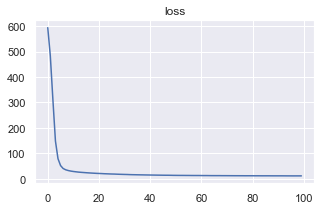

In [11]:
plt.figure(figsize=(5,3))
plt.plot(slhistory.epoch,slhistory.history['loss'])
plt.title('loss');

### Evaluation on Test Data

For a better measure of the quality of the model, let's see the model accuracy for the test data.

In [12]:
%%time

slpred = slmodel.predict(X_test_scaled)
print("Mean squared error: %.3f"
      % mean_squared_error(Y_test, slpred))
print()
#Mean Squared Error (loss) and the  Mean Absolute Error (metrics)

print(slmodel.evaluate(X_test_scaled, Y_test))


Mean squared error: 10.650

4/4 [==============================] - 0s 801us/step - loss: 10.6504 - mae: 2.3231
[10.650408744812012, 2.3230905532836914]
CPU times: user 214 ms, sys: 4.22 ms, total: 218 ms
Wall time: 210 ms


Text(0.5, 1.0, 'Real vs Predicted Housing Prices')

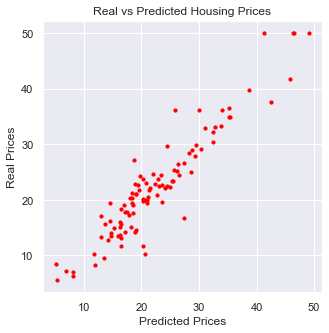

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
plt.scatter( slpred, Y_test, s=10, color='red' )
plt.xlabel( "Predicted Prices")
plt.ylabel( "Real Prices")
plt.title( "Real vs Predicted Housing Prices")

## Multilayer Perceptron

In [14]:
mlmodel = Sequential()

mlmodel.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu'))
mlmodel.add(Dropout(0.2))
mlmodel.add(Dense(units=64, activation='relu'))
mlmodel.add(Dropout(0.2))

mlmodel.add(Dense(units=1))
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)
mlmodel.compile(loss='mean_squared_error', 
                optimizer=opt, metrics=['mae'])
print(mlmodel.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                448       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
%%time
mlhistory = mlmodel.fit(X_train_scaled, Y_train, epochs=100 )


Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 532.0904 - mae: 21.1427
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 207.3478 - mae: 11.8532
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 71.4230 - mae: 6.1627
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 54.2137 - mae: 5.4979
Epoch 5/100
13/13 [==============================] - 0s 950us/step - loss: 45.2587 - mae: 4.9318
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 37.1368 - mae: 4.6335
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 33.8144 - mae: 4.4914
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 35.9926 - mae: 4.5590
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 44.7382 - mae: 4.5605
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 38.5760 - mae: 4.5063
Epoch 11/100
13/13 [=======================

13/13 [==============================] - 0s 1ms/step - loss: 19.2774 - mae: 3.2395
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 18.9556 - mae: 3.1113
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 15.8524 - mae: 2.9238
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 14.1162 - mae: 2.7839
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 16.7161 - mae: 3.0378
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 22.0450 - mae: 3.4067
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 20.7883 - mae: 3.3803
Epoch 93/100
13/13 [==============================] - 0s 2ms/step - loss: 15.7136 - mae: 2.9126
Epoch 94/100
13/13 [==============================] - 0s 2ms/step - loss: 16.7011 - mae: 3.1355
Epoch 95/100
13/13 [==============================] - 0s 2ms/step - loss: 18.2084 - mae: 3.0795
Epoch 96/100
13/13 [==============================] -

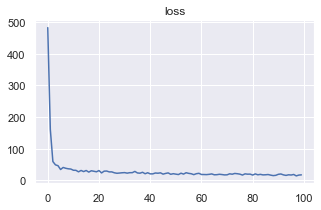

In [16]:
plt.figure(figsize=(5,3))
plt.plot(mlhistory.epoch,mlhistory.history['loss'])
plt.title('loss');

Loss is a function of the difference of the network output and the target values. I am minimizing the loss function during training so it should decrease over time.

In [17]:
#%%time

mlpred = mlmodel.predict(X_test_scaled)
print("Mean squared error: %.3f"
      % mean_squared_error(Y_test, mlpred))

print(mlmodel.evaluate(X_test_scaled, Y_test))

Mean squared error: 9.143
4/4 [==============================] - 0s 877us/step - loss: 9.1435 - mae: 2.2822
[9.143486022949219, 2.282249689102173]


Text(0.5, 1.0, 'Real vs Predicted Housing Prices')

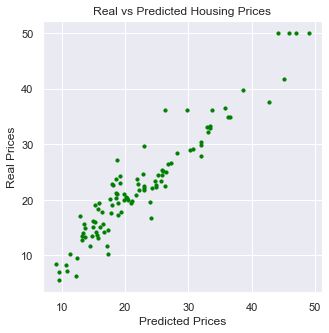

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
plt.scatter( mlpred, Y_test, s=10, color='green' )
plt.xlabel( "Predicted Prices")
plt.ylabel( "Real Prices")
plt.title( "Real vs Predicted Housing Prices")